# **Proyecto - Clasificación y Prueba de Hipótesis: Predicción de Cancelación de Reserva de Hotel**

## **Marcas: 40**

---------------
## **Enunciado del problema**

### **Contexto**

**Un número significativo de reservas de hotel se cancelan debido a anulaciones o por no presentarse.** Las razones típicas de las cancelaciones incluyen cambios de planes, conflictos de programación, etc. Esto a menudo se facilita con la opción de hacerlo gratis o preferiblemente a bajo costo. Esto puede ser beneficioso para los huéspedes del hotel, pero es un factor menos deseable y que posiblemente disminuya los ingresos para los hoteles. Tales pérdidas son particularmente altas en las cancelaciones de última hora.

Las nuevas tecnologías que involucran canales de reserva en línea han cambiado drásticamente las posibilidades y el comportamiento de reserva de los clientes. Esto agrega una dimensión adicional al desafío de cómo los hoteles manejan las cancelaciones, que ya no se limitan a la reserva tradicional y las características de los huéspedes.

Este patrón de cancelaciones de reservas afecta a un hotel en varios frentes:
1. **Pérdida de recursos (ingresos)** cuando el hotel no puede revender la habitación.
2. **Costos adicionales de los canales de distribución** al aumentar las comisiones o pagar publicidad para ayudar a vender estas habitaciones.
3. **Bajar los precios en el último minuto**, para que el hotel pueda revender una habitación, lo que reduce el margen de beneficio.
4. **Recursos humanos para hacer arreglos** para los invitados.

### **Objetivo**

Este número creciente de cancelaciones requiere una solución basada en Machine Learning que pueda ayudar a predecir qué reserva es probable que se cancele. INN Hotels Group tiene una cadena de hoteles en Portugal: se enfrentan a problemas con esta gran cantidad de cancelaciones de reservas y se han puesto en contacto con su empresa para obtener soluciones basadas en datos. Usted, como científico de datos, debe analizar los datos proporcionados para encontrar qué factores tienen una gran influencia en las cancelaciones de reservas, crear un modelo predictivo que pueda predecir qué reserva se cancelará por adelantado y ayudar a formular políticas rentables para las cancelaciones. y reembolsos.


### **Descripción de datos**

Los datos contienen los diferentes atributos de los detalles de reserva de los clientes. El diccionario de datos detallado se proporciona a continuación:


**Diccionario de datos**

* **Booking_ID:** Identificador único de cada reserva
* **no_of_adults:** Número de adultos
* **no_de_children:** Número de hijos
* **no_of_weekend_nights:** Número de noches de fin de semana (sábado o domingo) que el huésped se hospedó o reservó para quedarse en el hotel
* **no_of_week_nights:** Número de noches entre semana (de lunes a viernes) que el huésped se hospedó o reservó para quedarse en el hotel
* **type_of_meal_plan:** Tipo de plan de comidas reservado por el cliente:
  * No seleccionado: no se seleccionó ningún plan de comidas
  * Plan de comidas 1 – Desayuno
  * Régimen de comidas 2 – Media pensión (desayuno y otra comida)
  * Plan de comidas 3 – Pensión completa (desayuno, almuerzo y cena)
* **required_car_parking_space:** ¿Necesita el cliente una plaza de estacionamiento? (0 - No, 1- Sí)
* **room_type_reserved:** Tipo de habitación reservada por el cliente. Los valores son cifrados (codificados) por INN Hotels.
* **lead_time:** Número de días entre la fecha de reserva y la fecha de llegada
* **arrival_year:** Año de la fecha de llegada
* **arrival_month:** Mes de la fecha de llegada
* **arrival_date:** Fecha del mes de llegada
* **market_segment_type:** Designación del segmento de mercado.
* **repeat_guest:** ¿Es el cliente un invitado repetido? (0 - No, 1- Sí)
* **no_of_previous_cancellations:** Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual
* **no_of_previous_bookings_not_canceled:** Número de reservas anteriores no canceladas por el cliente antes de la reserva actual
* **avg_price_per_room:** Precio medio por día de la reserva; los precios de las habitaciones son dinámicos. (en euros)
* **no_of_special_requests:** Número total de solicitudes especiales realizadas por el cliente (por ejemplo, piso alto, vista desde la habitación, etc.)
* **booking_status:** Indicador que indica si la reserva fue cancelada o no.

## **Importando las bibliotecas requeridas**

In [17]:
# Importing the basic libraries we will require for the project


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Cargando el conjunto de datos**

In [18]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [19]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Resumen del conjunto de datos**

### **Ver las primeras y las últimas 5 filas del conjunto de datos**

Vamos a **ver las primeras filas y las últimas filas** del conjunto de datos para comprender un poco mejor su estructura.

Usaremos los métodos head() y tail() de Pandas para hacer esto.

In [20]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [21]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Comprender la forma del conjunto de datos**

In [22]:
data.shape

(36275, 19)

* El conjunto de datos tiene 36275 filas y 19 columnas.

### **Verifique los tipos de datos de las columnas para el conjunto de datos**

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type` y `booking_status` son de tipo objeto, mientras que las demás columnas son de naturaleza numérica.
* No hay valores nulos en el conjunto de datos.

### **Descartando valores duplicados**

In [24]:
# checking for duplicate values
data.duplicated().sum()

0

- No hay **valores duplicados** en los datos.

### **Eliminar la columna de valores únicos**

**Eliminemos primero la columna Booking_ID antes de continuar**, ya que una columna con valores únicos casi no tendrá poder predictivo para el problema de aprendizaje automático en cuestión.

In [25]:
data = data.drop(["Booking_ID"], axis=1)

In [26]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Pregunta 1: Verifique las estadísticas resumidas del conjunto de datos y escriba sus observaciones (2 puntos)**

**Veamos el resumen estadístico de los datos.**

In [27]:
# Remove _________ and complete the code
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Escriba sus respuestas aquí:
- En el tiempo de espera (lead_time) la media y la desvicion standar son muy parecidas, esto sugiere que los datos tienden a estar concentrados alrededor de la media y que la distribución de los datos es relativamente simétrica y estrecha.
- Igualmente, el lead_time presenta valores atipicos en el percentil 75% (126) y el max (443), por lo tanto es importante reconocer la presencia de estos valores atípicos y considerar cómo manejarlos en tu análisis de datos, teniendo en cuenta el contexto del dominio y los objetivos del estudio.

## **Análisis exploratorio de datos**

### **Pregunta 2: Análisis univariado**

Exploremos estas variables con más profundidad observando sus distribuciones.

Primero definiremos una función **hist_box()** que proporciona tanto un gráfico de caja como un histograma en el mismo objeto visual, con el que podemos realizar un análisis univariante en las columnas de este conjunto de datos.

In [28]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

#### **Pregunta 2.1: Grafique el histograma y el diagrama de caja para la variable `Lead Time` utilizando la función hist_box provista y escriba sus ideas. (1 Punto)**

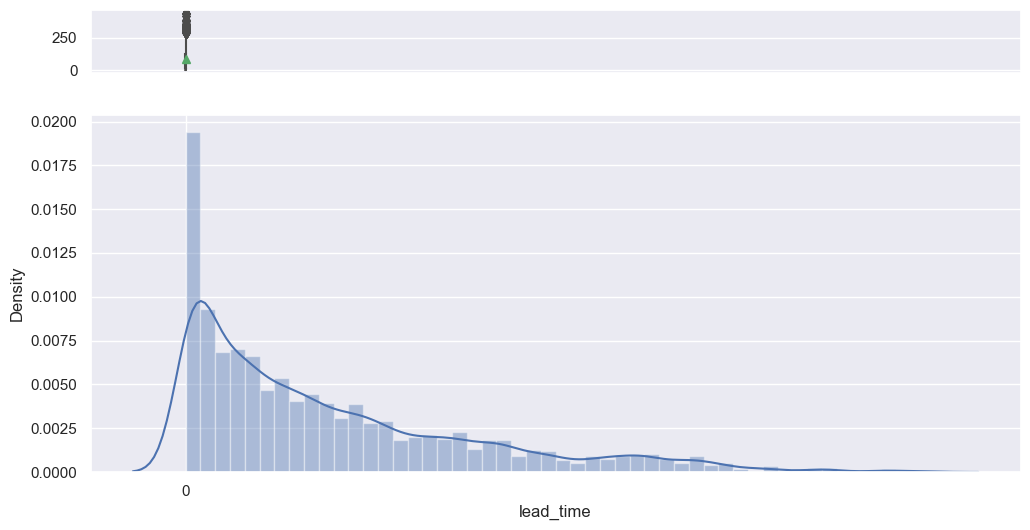

In [29]:
# Remove _________ and complete the code
hist_box(data,"lead_time") 

Escriba sus respuestas aquí:
- La distribucion de tiempo de espera (lead_time) esta sesgada a la derecha.
- El diagrama de caja muestar valores atipicos al extremo derecho 

#### **Pregunta 2.2: Grafique el histograma y el diagrama de caja para la variable `Average Price per Room` usando la función hist_box provista y escriba sus ideas. (1 Punto)**

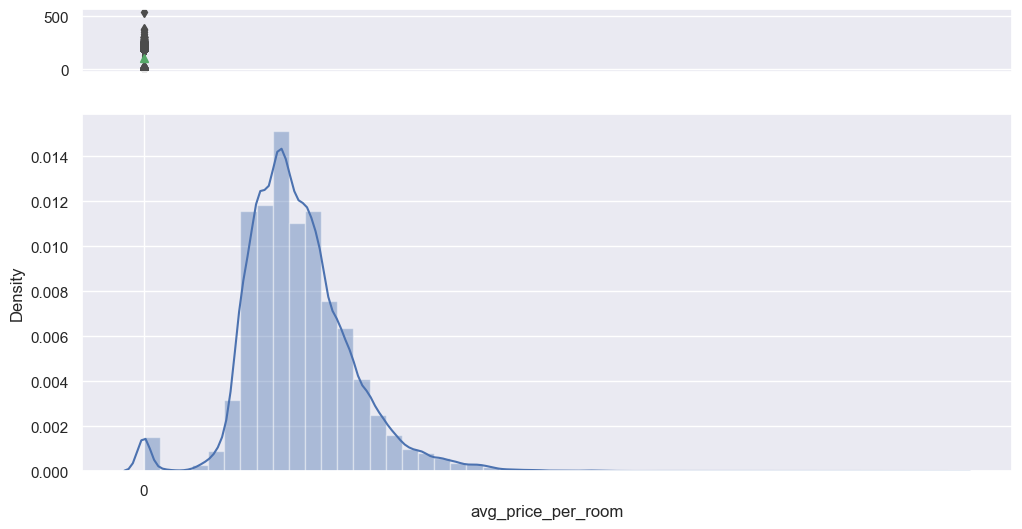

In [30]:
# Remove _________ and complete the code
hist_box(data,"avg_price_per_room")

Escriba sus respuestas aquí: 
- La distribucion de valor promedio por habitacion (avg_price_per_room) esta sesgada a la derecha.
- El diagrama de caja muestra valores atipicos al extremo derecho

**Curiosamente algunas habitaciones tienen un precio igual a 0. Vamos a revisarlas.**

In [41]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- Hay bastantes habitaciones de hotel que tienen un precio igual a 0.
- En la columna de segmento de mercado, parece que muchos valores son complementarios.

In [42]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* Tiene sentido que la mayoría de los valores con precios de habitaciones iguales a 0 sean las habitaciones que se ofrecen como servicio de cortesía del hotel.
* Las habitaciones reservadas en línea deben ser parte de alguna campaña promocional realizada por el hotel.

In [43]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [44]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Comprendamos la distribución de las variables categóricas**

**Número de hijos**

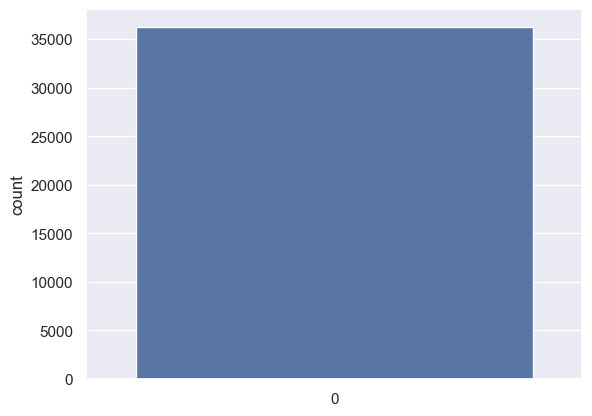

In [45]:
sns.countplot(data['no_of_children'])
plt.show()

In [46]:
data['no_of_children'].value_counts(normalize=True)

0    0.925624
1    0.044604
2    0.029166
3    0.000606
Name: no_of_children, dtype: float64

* Los clientes no viajaban con niños en el 93 % de los casos.
* Hay algunos valores en los datos donde el número de niños es 9 o 10, lo cual es muy poco probable.
* Reemplazaremos estos valores con el valor máximo de 3 niños.

In [47]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Mes de Llegada**

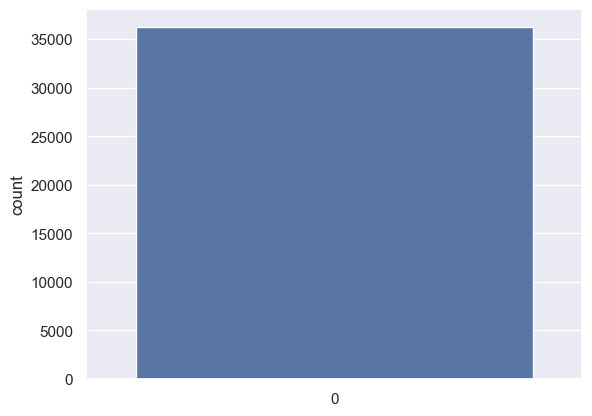

In [48]:
sns.countplot(data["arrival_month"])
plt.show()

In [49]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

* Octubre es el mes más activo para las llegadas de hoteles, seguido de septiembre y agosto.**Más del 35% de todas las reservas**, como vemos en la tabla anterior, fueron para uno de estos tres meses.
* Alrededor del 14.7% de las reservas se realizaron para una llegada en octubre.

**Estado de la reserva**

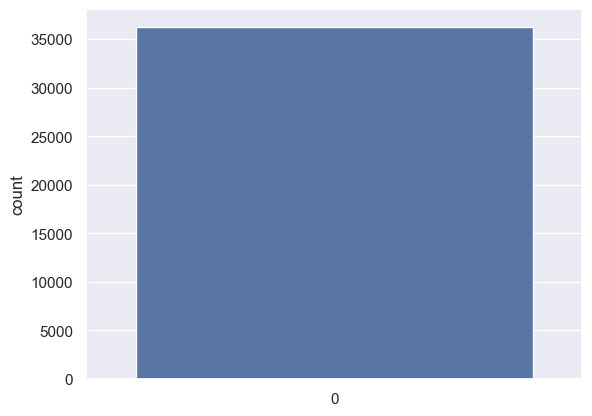

In [99]:
sns.countplot(data["booking_status"])
plt.show()

In [51]:
data["booking_status"].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

* El 32.8% de las reservas fueron canceladas por los clientes.

**Codifiquemos las reservas canceladas en 1 y no canceladas en 0 para un análisis más detallado**

In [52]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### **Pregunta 3: Análisis bivariado**

#### **Pregunta 3.1: Encuentre y visualice la matriz de correlación usando un mapa de calor y escriba sus observaciones de la gráfica. (2 Puntos)**

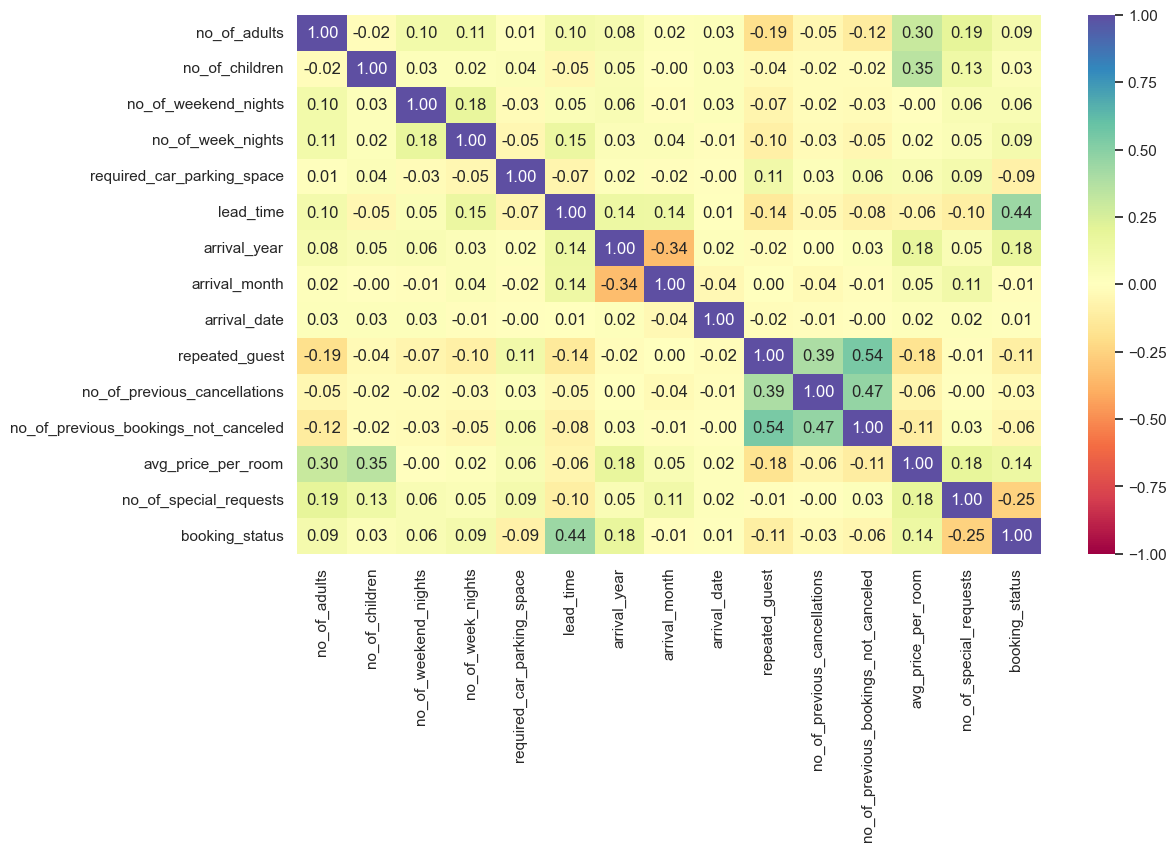

In [53]:
# Remove _________ and complete the code
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Escriba sus respuestas aquí: 
- Se presenta una correlacion positiva entre (no_of_previous_bookings_not_canceled) y (repeated_guest) esto debido a causas como: Lealtad del Huesped, La calidad del servicio o simplemente fidelidad a la marca
- Caso contrario en el (arrival_year) y (arrival_month) se presenta una correlacion negativa. Una correlación negativa entre el año de llegada y el mes de llegada puede sugerir una preferencia estacional constante de los visitantes a lo largo de los años, con ciertos meses siendo más populares que otros. Esto puede estar relacionado con factores climáticos, eventos estacionales, ofertas promocionales u otras consideraciones estacionales. Es importante comprender esta relación para la gestión eficaz del turismo y la planificación del lugar de destino. 

**Las tarifas de los hoteles son dinámicas y cambian según la demanda y la demografía del cliente. Veamos cómo varían los precios en los diferentes segmentos del mercado**

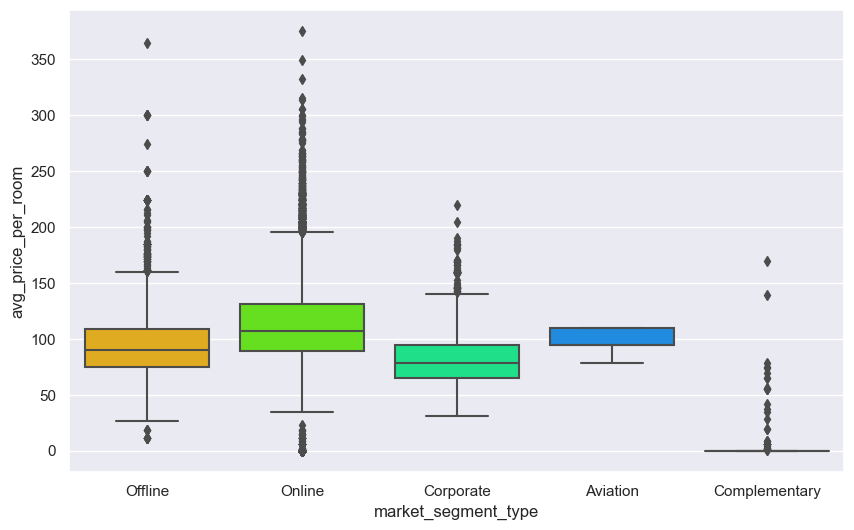

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Las habitaciones reservadas en línea tienen altas variaciones en los precios.
* Los precios de las habitaciones fuera de línea y corporativas son casi similares.
* El segmento de mercado complementario obtiene las habitaciones a precios muy bajos, lo cual tiene sentido.

Definiremos una función **stacked barplot ()** para ayudar a analizar cómo varía la variable de destino entre las categorías de predictor.

In [55]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

#### **Pregunta 3.2: Trace el diagrama de barras apiladas para la variable `Market Segment Type` contra la variable de destino `Booking Status` utilizando la función de diagrama de barras apiladas proporcionada y escriba sus ideas. (1 Punto)**

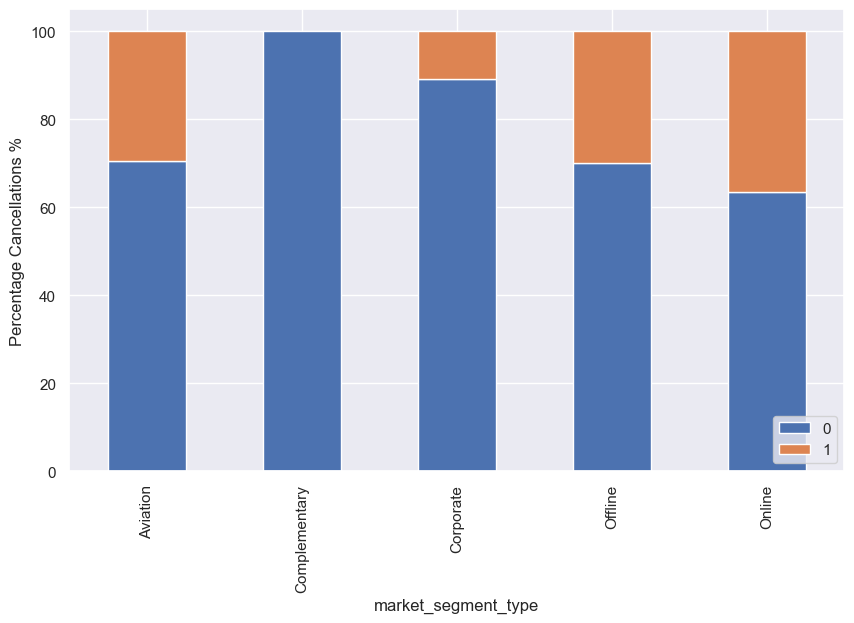

In [56]:
# Remove _________ and complete the code
stacked_barplot(data,"market_segment_type","booking_status")

Escriba sus respuestas aquí:
- El segmento complementario es el mayor tasa de cancelacion presenta, seguido del Corporativo, el Online presenta la menor tasa de cancelaciones
- Se deben implementar estartegias de penalidad y premio con el fin de disminuir las tasas de cancelacion en los sectores complementario y corporativo.

#### **Pregunta 3.3: Trace el diagrama de barras apiladas para la variable `Repeated Guest` contra la variable de destino `Booking Status` usando la función stacked_barplot y escriba sus ideas. (1 Punto)**

Los huéspedes que repiten son los huéspedes que se quedan en el hotel con frecuencia y son importantes para el valor de la marca.

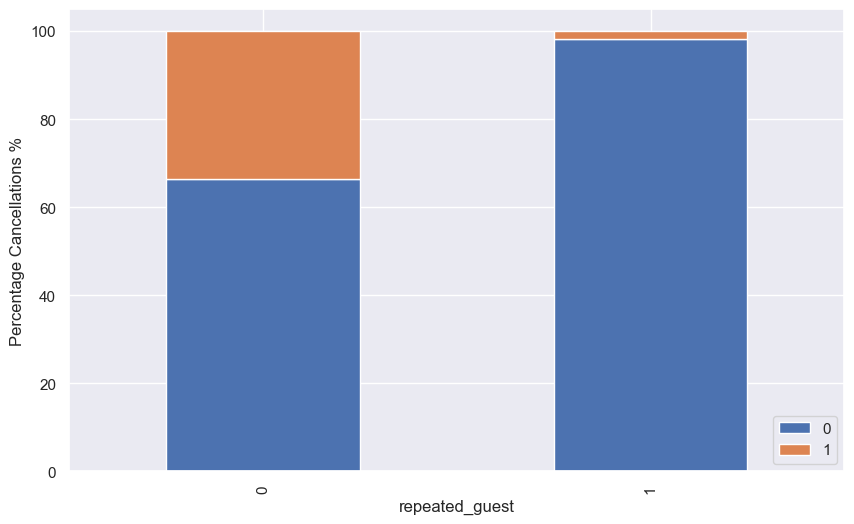

In [57]:
# Remove _________ and complete the code
stacked_barplot(data, "repeated_guest", "booking_status")

Escriba sus respuestas aquí:
- Los guest que repiten cancelan menos, que los nuevos guest

**Analicemos al cliente que se quedó al menos un día en el hotel.**

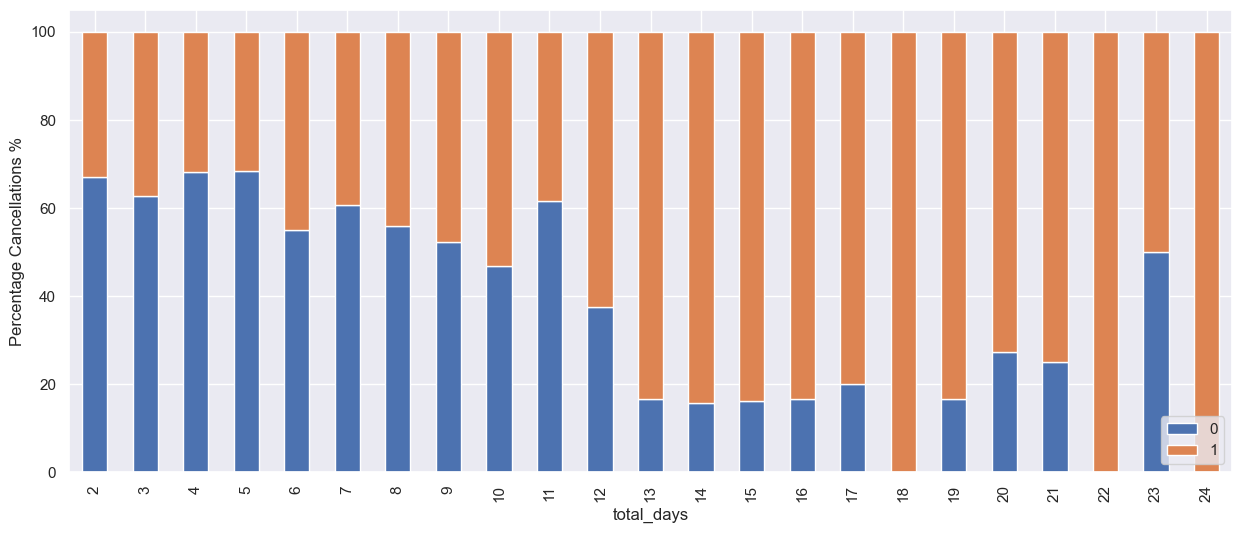

In [58]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

* La tendencia general es que las posibilidades de cancelación aumentan a medida que aumenta el número de días que el cliente tenía previsto permanecer en el hotel.

**Como los precios de las habitaciones de hotel son dinámicos, veamos cómo varían los precios en diferentes meses**

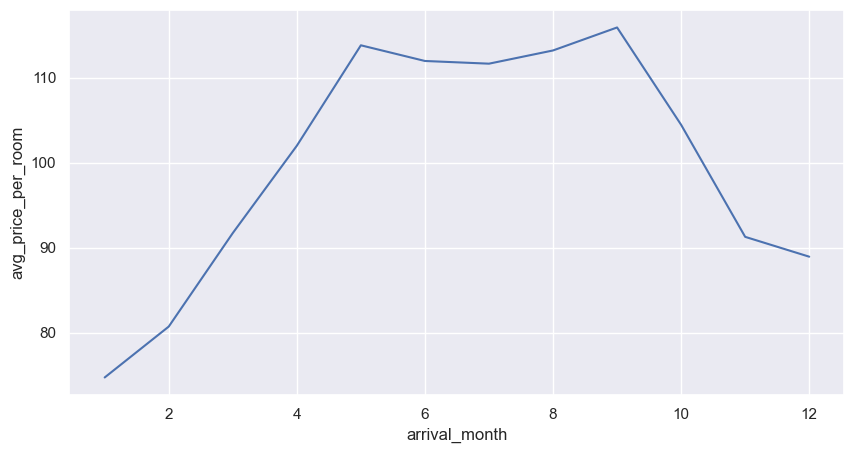

In [59]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* El precio de las habitaciones es más alto de mayo a septiembre: alrededor de 115 euros por habitación.

## **Preparación de datos para el modelado**

- Queremos predecir qué reservas se cancelarán.
- Antes de proceder a construir un modelo, tendremos que codificar características categóricas.
- Dividiremos los datos en entrenamiento y prueba para poder evaluar el modelo que construimos en los datos del entrenamiento.

**Separando las variables independientes (X) y la variable dependiente (Y)**

In [60]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

**Dividir los datos en un 70 % de entrenamiento y un 30 % de prueba**

Algunos problemas de clasificación pueden exhibir un gran desequilibrio en la distribución de las clases objetivo: por ejemplo, podría haber varias veces más muestras negativas que muestras positivas. En tales casos, se recomienda utilizar la técnica de **muestreo estratificado** para garantizar que las frecuencias de clase relativas se conserven aproximadamente en cada entrenamiento y pliegue de validación.

In [61]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, stratify=Y, random_state=1)

In [62]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


## **Modelo Criterio de Evaluación**

#### **El modelo puede hacer predicciones incorrectas como:**

1. Predecir que un cliente no cancelará su reserva, pero en realidad, el cliente cancelará su reserva.
2. Predecir que un cliente cancelará su reserva pero, en realidad, el cliente no cancelará su reserva.

#### **¿Qué caso es más importante?**

Ambos casos son importantes como:

* Si prevemos que una reserva no se cancelará y la reserva se cancela, el hotel perderá recursos y tendrá que hacerse cargo de los costos adicionales de los canales de distribución.
* Si predecimos que una reserva se cancelará y la reserva no se cancela, es posible que el hotel no pueda brindar servicios satisfactorios al cliente asumiendo que esta reserva se cancelará. Esto podría dañar el valor de la marca.



#### **¿Cómo reducir las pérdidas?**

* El hotel querría maximizar la "Puntuación F1", cuanto mayor sea la puntuación F1, mayores serán las posibilidades de minimizar los falsos negativos y los falsos positivos.

**Además, creemos una función para calcular e imprimir el informe de clasificación y la matriz de confusión para que no tengamos que volver a escribir el mismo código repetidamente para cada modelo.**

In [63]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Construyendo el modelo**

Construiremos 4 modelos diferentes:

- **Regresión logística**
- **Máquina de vectores de soporte (SVM)**
- **Árbol de decisión**
- **Bosque aleatorio**

### **Pregunta 4: Regresión logística (6 puntos)**

#### **Pregunta 4.1: Cree un modelo de regresión logística (utilice la biblioteca sklearn) (1 punto)**

In [64]:
# Remove _________ and complete the code

# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

#### **Pregunta 4.2: Compruebe el rendimiento del modelo en los datos de entrenamiento y los datos de prueba (2 puntos)**

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     17073
           1       0.73      0.60      0.66      8319

    accuracy                           0.79     25392
   macro avg       0.77      0.74      0.75     25392
weighted avg       0.79      0.79      0.79     25392



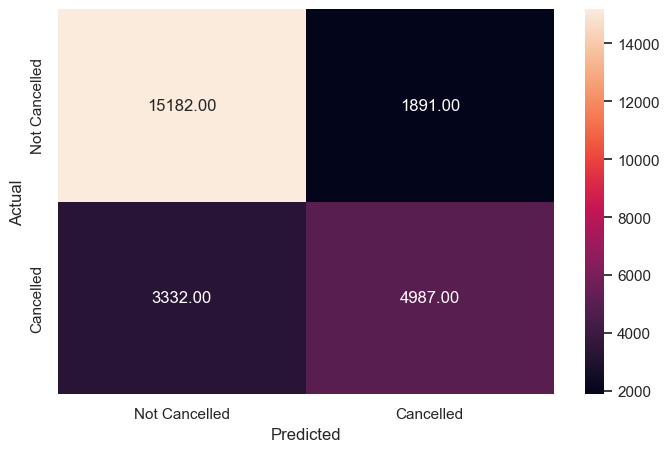

In [65]:
# Remove _________ and complete the code

# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

Escriba su respuesta aquí:
- Este modelo de regresión logística tiene un buen rendimiento en la clase 0 (no cancelación de reservas) con una alta precisión, recall y F1-score. Sin embargo, en la clase 1 (cancelación de reservas), aunque la precisión es aceptable, el recall es relativamente bajo, lo que indica que el modelo no captura todas las cancelaciones de reservas. La elección de métricas y la interpretación de los resultados dependerán de los objetivos específicos del problema y de si es más crítico minimizar falsos positivos o falsos negativos.

Comprobemos el rendimiento en el conjunto de prueba.

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.72      0.59      0.65      3566

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.78      0.79      0.78     10883



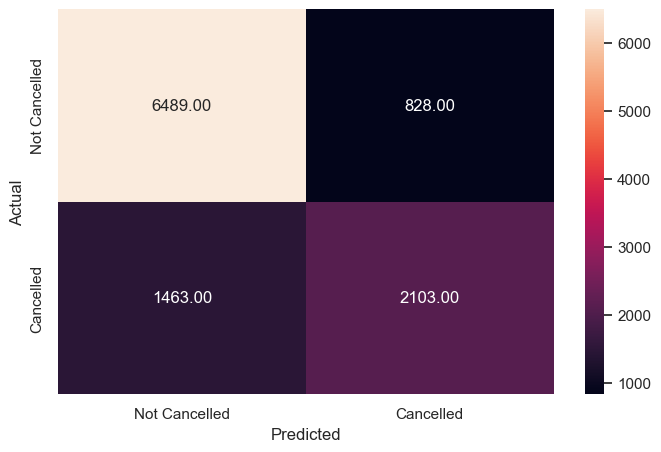

In [66]:
# Remove _________ and complete the code

# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

Escriba su respuesta aquí:
- Los resultados del test del modelo son muy similares a los resultados del entrenamiento, lo que sugiere que el modelo está generalizando de manera consistente tanto en los datos de entrenamiento como en los datos de prueba, Sin embargo, el recall para la clase 1 sigue siendo relativamente bajo, lo que significa que el modelo aún podría no estar capturando todas las cancelaciones de reservas en el conjunto de prueba. La elección de métricas y la interpretación de los resultados dependerán de los objetivos específicos del problema y de si es más crítico minimizar falsos positivos o falsos negativos.

#### **Pregunta 4.3: Encuentre el umbral óptimo para el modelo usando la curva Precision-Recall. (1 Punto)**

Las curvas Precision-Recall resumen el equilibrio entre la tasa positiva verdadera y el valor predictivo positivo para un modelo predictivo que utiliza diferentes umbrales de probabilidad.

Usemos la curva Precision-Recall y veamos si podemos encontrar un **mejor umbral.**

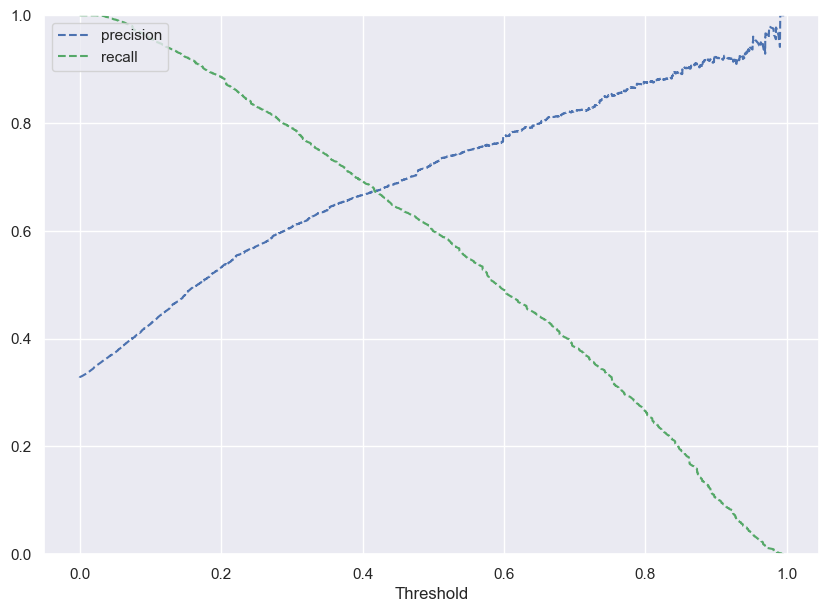

In [67]:
# Remove _________ and complete the code

# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

Escriba sus respuestas aquí: 
- el valor umbral de 0.41 debería ser suficiente porque tiene buena recuperación y no provoca una caída significativa en la precisión.

In [68]:
# Setting the optimal threshold
optimal_threshold = 0.41

#### **Pregunta 4.4: Compruebe el rendimiento del modelo en datos de entrenamiento y prueba utilizando el umbral óptimo. (2 Puntos)**

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17073
           1       0.67      0.69      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



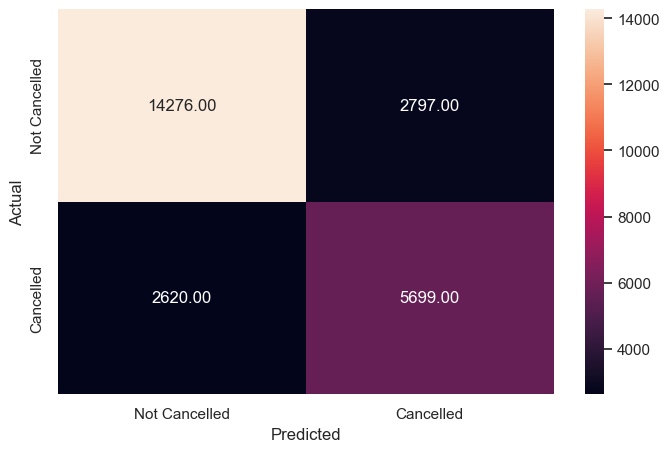

In [69]:
# Remove _________ and complete the code

# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

Escriba sus respuestas aquí: 
- El modelo parece funcionar de manera consistente y razonable en el conjunto de prueba, con un rendimiento similar al conjunto de entrenamiento

Comprobemos el rendimiento en el conjunto de prueba.

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      7317
           1       0.66      0.68      0.67      3566

    accuracy                           0.78     10883
   macro avg       0.75      0.76      0.75     10883
weighted avg       0.78      0.78      0.78     10883



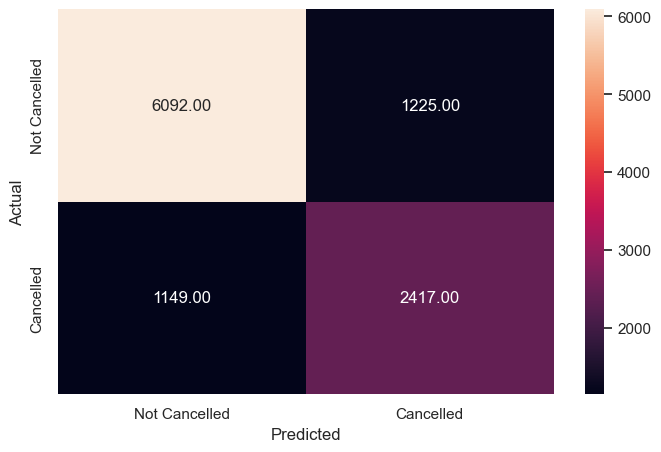

In [70]:
# Remove _________ and complete the code

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

Escriba sus respuestas aquí: 
- los resultados del modelo en el nuevo test son bastante coherentes con los resultados del conjunto de prueba anterior, lo que sugiere que el modelo sigue generalizando de manera consistente. Sin embargo, es importante tener en cuenta que la precisión y el recall siguen mostrando un equilibrio similar al conjunto de prueba anterior, con un F1-score razonable en ambas clases.

### **Pregunta 5: Máquinas de vectores de soporte (11 puntos)**

Para acelerar el entrenamiento de SVM, escalamos los datos para las máquinas de vectores de soporte.

In [71]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Construyamos los modelos usando dos de las funciones del núcleo ampliamente utilizadas:

1. **Kernel lineal**
2. **Kernel RBF**

#### **Pregunta 5.1: Construya un modelo de máquina de vectores de soporte utilizando un kernel lineal (1 punto)**

**Nota: utilice los datos escalados para modelar la máquina de vectores de soporte**

In [72]:
# Remove _________ and complete the code

svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

#### **Pregunta 5.2: Verifique el rendimiento del modelo en los datos de entrenamiento y prueba (2 puntos)**

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



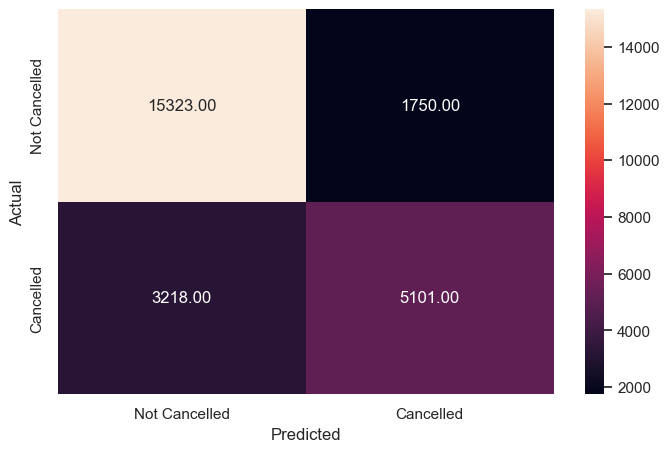

In [73]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

Escriba sus respuestas aquí: 
- El modelo de SVM con kernel lineal parece tener un mejor rendimiento en términos de precisión, recall y F1-score para ambas clases. Además, la precisión y el recall para la clase 1 son más equilibrados en este modelo de SVM

Comprobación del rendimiento del modelo en el conjunto de prueba

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



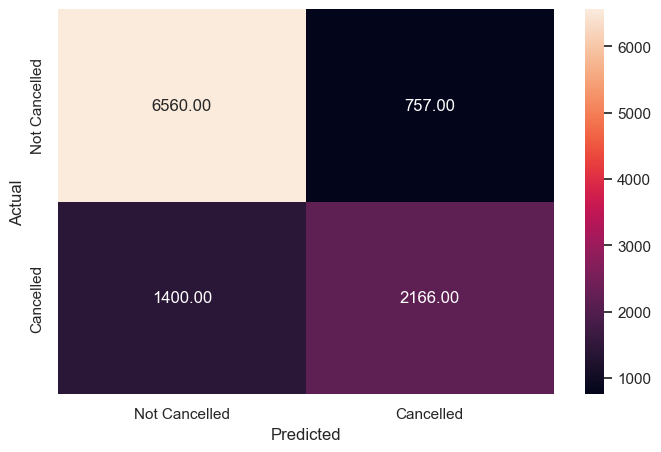

In [74]:
# Remove _________ and complete the code

y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

Escriba sus respuestas aquí:
- Estos resultados en el conjunto de prueba son consistentes con los del conjunto de entrenamiento, lo que sugiere que el modelo de SVM con kernel lineal generaliza de manera consistente. En general, el modelo de SVM parece funcionar bien, con un F1-score de 0.67 para la clase 1, lo que indica un equilibrio entre precisión y recall. 

#### **Pregunta 5.3: Encuentre el umbral óptimo para el modelo utilizando la curva Precision-Recall. (1 Punto)**

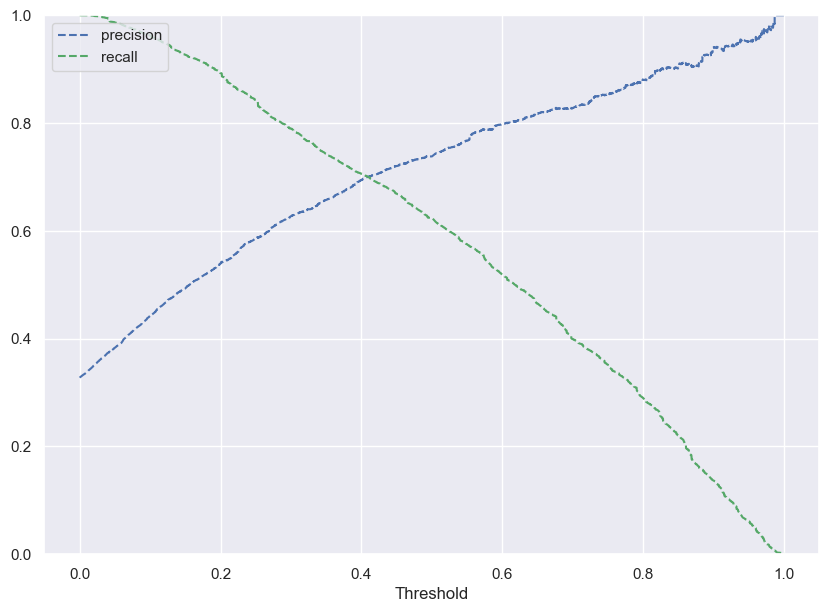

In [75]:
# Remove _________ and complete the code

# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

Escriba sus respuestas aquí:
- Un umbral de 0.4 puede aumentar el recall a expensas de la precisión, lo que significa que se estara capturando más casos verdaderos positivos, pero también se pueden obtener más falsos positivos, con objetivo es maximizar el recall o identificar la mayoría de los casos positivos, un umbral más bajo como 0.4 puede ser apropiado.

In [76]:
optimal_threshold_svm= 0.4

#### **Pregunta 5.4: Compruebe el rendimiento del modelo en datos de entrenamiento y prueba utilizando el umbral óptimo. (2 Puntos)**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     17073
           1       0.69      0.71      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.77      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



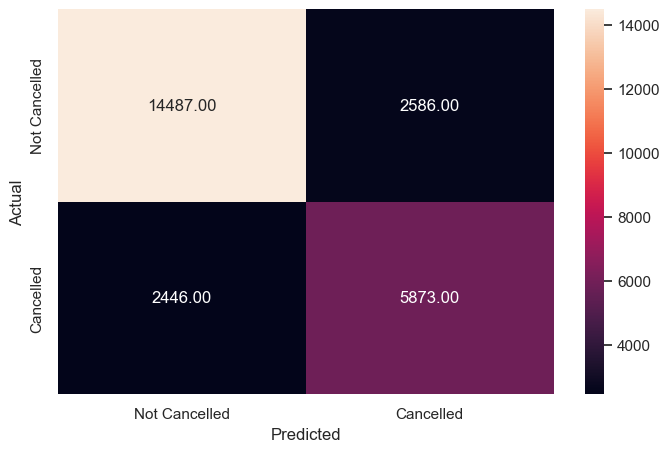

In [77]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

Escriba sus respuestas aquí: 
- Parece que el modelo con el umbral óptimo funciona bien y es capaz de predecir la cancelación de reservas de manera efectiva. La elección del umbral óptimo ha permitido equilibrar precisión y recall según tus necesidades específicas.

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7317
           1       0.68      0.71      0.69      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



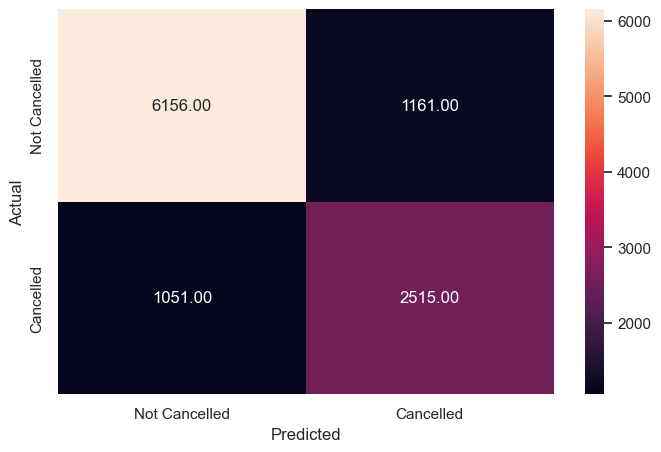

In [78]:
# Remove _________ and complete the code

y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

Escriba sus respuestas aquí: 
- Estos resultados en el conjunto de prueba son coherentes con los resultados en los conjuntos de entrenamiento y prueba anteriores, lo que sugiere que el modelo con el umbral óptimo generaliza de manera consistente. El modelo sigue demostrando un buen equilibrio entre precisión y recall para ambas clases, y el F1-score proporciona un equilibrio razonable entre ambas métricas.

#### **Pregunta 5.5: Cree un modelo de máquinas de vectores de soporte utilizando un kernel RBF (1 punto)**

In [79]:
# Remove _________ and complete the code

svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

#### **Pregunta 5.6: Verifique el rendimiento del modelo en los datos de entrenamiento y prueba (2 puntos)**

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



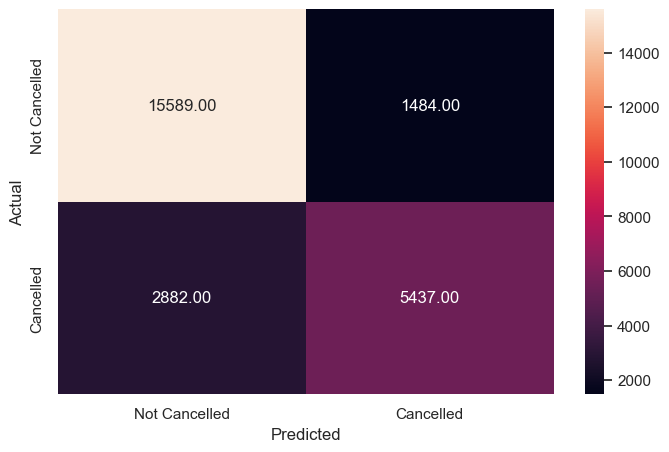

In [80]:
# Remove _________ and complete the code

y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

Escriba sus respuestas aquí: 
- Estos resultados indican que el modelo de SVM con kernel RBF en el conjunto de entrenamiento tiene un buen rendimiento en términos de precisión y F1-score, pero el recall para la clase 1 es un poco más bajo en comparación con la clase 0. El F1-score muestra un equilibrio razonable entre precisión y recall para ambas clases.

#### Comprobación del rendimiento del modelo en el conjunto de prueba

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7317
           1       0.78      0.63      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.81      0.77      0.78     10883
weighted avg       0.82      0.82      0.81     10883



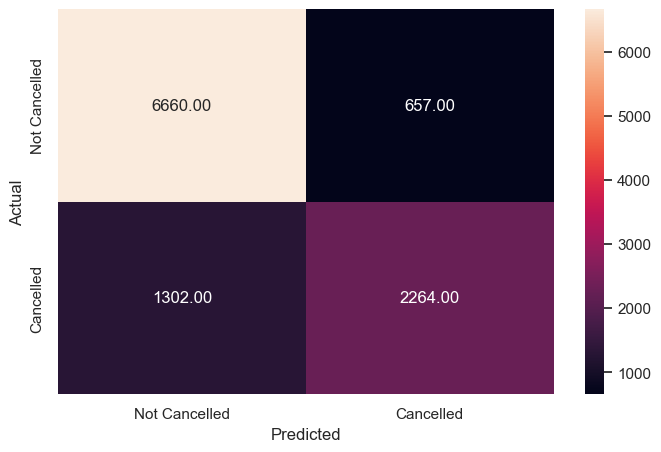

In [81]:
# Remove _________ and complete the code

y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

Escriba sus respuestas aquí: 
- El modelo de SVM con kernel RBF sigue funcionando bien en la tarea de predecir la cancelación de reservas y es capaz de mantener un rendimiento sólido en datos de prueba no vistos. Sin embargo, es importante considerar las implicaciones comerciales y el equilibrio entre precisión y recall al evaluar el rendimiento del modelo

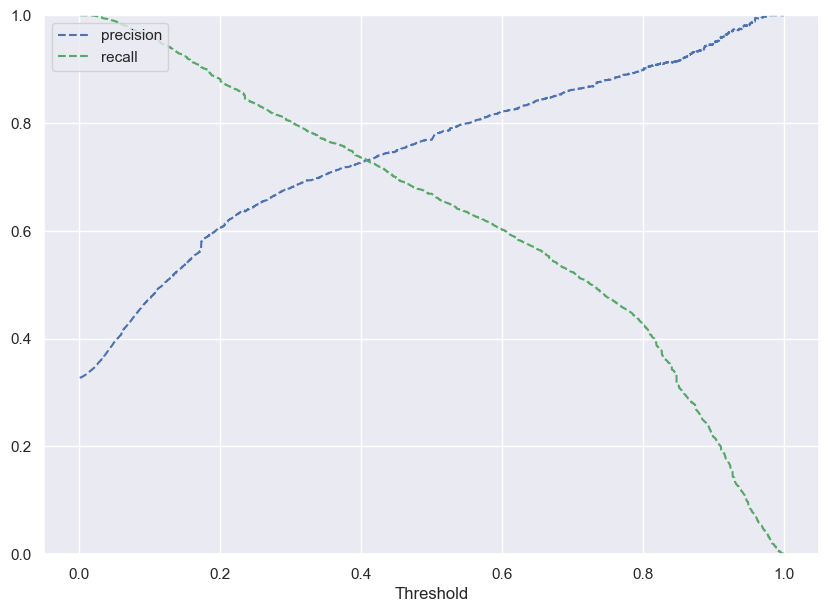

In [82]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [83]:
optimal_threshold_svm= 0.4

#### **Pregunta 5.7: Compruebe el rendimiento del modelo en datos de entrenamiento y prueba utilizando el umbral óptimo. (2 Puntos)**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     17073
           1       0.69      0.71      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.77      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



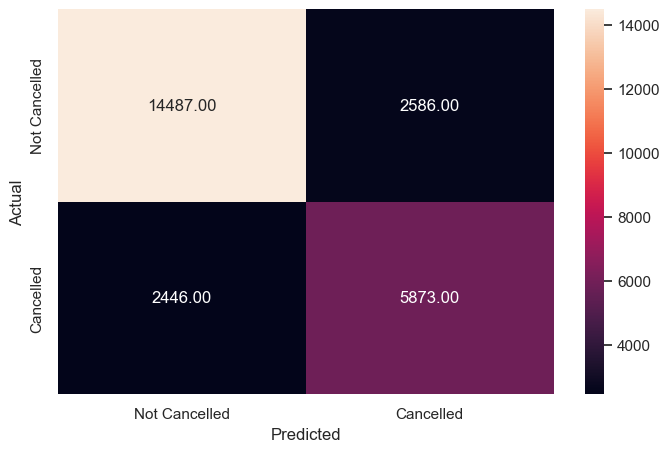

In [84]:
# Remove _________ and complete the code

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

Escriba sus respuestas aquí:
- Estos resultados muestran que, con el umbral óptimo de 0.4, el modelo mantiene un buen equilibrio entre precisión y recall para ambas clases en el conjunto de prueba. El F1-score proporciona un equilibrio razonable entre ambas métricas.

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7317
           1       0.72      0.73      0.72      3566

    accuracy                           0.82     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.82      0.82      0.82     10883



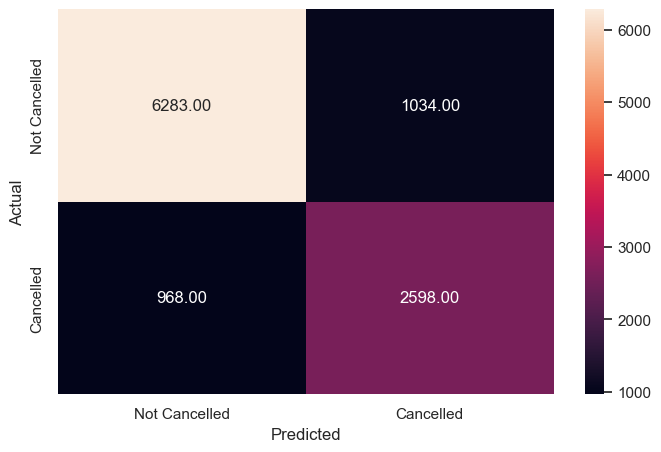

In [85]:
# Remove _________ and complete the code

y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

Escriba sus respuestas aquí: 
- Estos resultados en el nuevo conjunto de prueba muestran que el modelo mantiene un buen equilibrio entre precisión y recall para ambas clases. El F1-score proporciona un equilibrio razonable entre ambas métricas.

### **Pregunta 6: Árboles de decisión (7 puntos)**

#### **Pregunta 6.1: Construya un modelo de árbol de decisión (1 punto)**

In [86]:
# Remove _________ and complete the code

model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### **Pregunta 6.2: Verifique el rendimiento del modelo en los datos de entrenamiento y prueba (2 puntos)**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



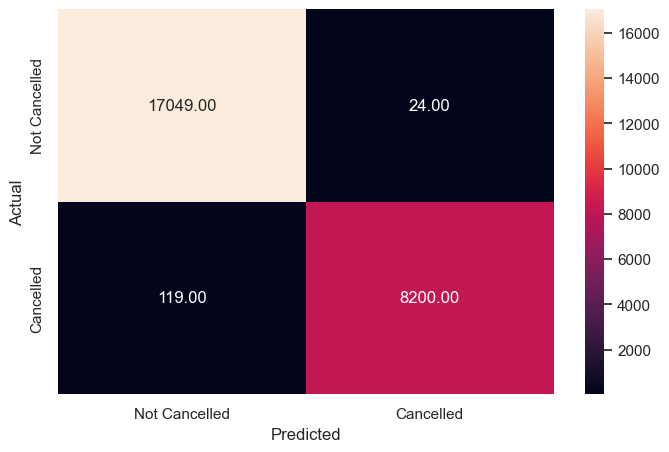

In [87]:
# Remove _________ and complete the code

# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

Escriba sus respuestas aquí: 
- Estos resultados sugieren que el modelo de árbol de decisión está realizando prácticamente una clasificación perfecta en el conjunto de entrenamiento, con altas puntuaciones de precisión y recall en ambas clases. Sin embargo, es importante recordar que los resultados en el conjunto de entrenamiento pueden no reflejar necesariamente el rendimiento real del modelo en datos de prueba no vistos.

#### Comprobación del rendimiento del modelo en el conjunto de prueba

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7317
           1       0.79      0.79      0.79      3566

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



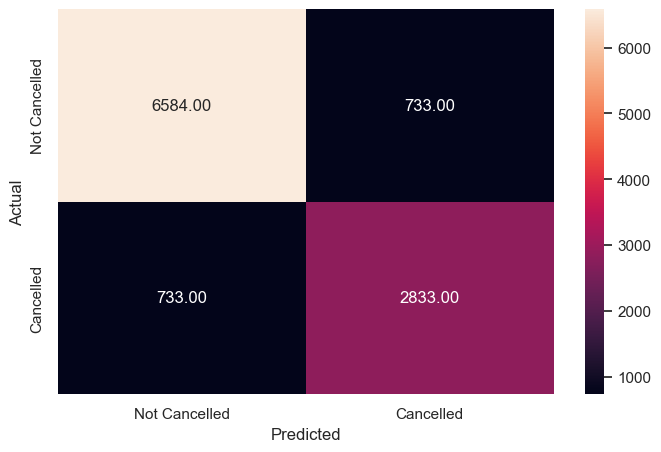

In [88]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

Escriba sus respuestas aquí: 
- Estos resultados demuestran que el modelo de árbol de decisión mantiene un buen equilibrio entre precisión y recall en el nuevo conjunto de prueba, lo que indica su capacidad de generalización en datos de prueba no vistos. La elección del modelo de árbol de decisión parece ser efectiva en esta tarea y está funcionando bien en una variedad de conjuntos de prueba.

#### **Pregunta 6.3: Realice el ajuste de hiperparámetros para el modelo de árbol de decisiones utilizando GridSearch CV (1 punto)**

**Nota: utilice los siguientes hiperparámetros proporcionados para ajustar el árbol de decisiones. En general, puede experimentar con varios hiperparámetros para ajustar el árbol de decisión, pero para este proyecto, recomendamos que se apegue a los parámetros proporcionados.**

In [89]:
# Remove _________ and complete the code

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Pregunta 6.4: Compruebe el rendimiento del modelo en los datos de entrenameinto y prueba utilizando el modelo ajustado (2 Puntos)**

#### Comprobación del rendimiento en el conjunto de entrenamiento

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17073
           1       0.82      0.68      0.75      8319

    accuracy                           0.85     25392
   macro avg       0.84      0.81      0.82     25392
weighted avg       0.85      0.85      0.84     25392



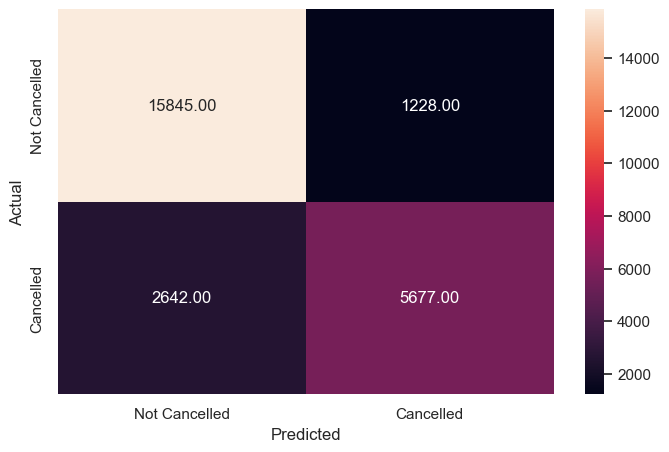

In [90]:
# Remove _________ and complete the code

# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

Escriba sus respuestas aquí: 
- Estos resultados indican que el modelo ajustado de árbol de decisión mantiene un buen equilibrio entre precisión y recall para ambas clases en el conjunto de entrenamiento, con un F1-score razonable para ambas clases. La mejora en la precisión y el recall en comparación con el modelo anterior sugiere que el ajuste de hiperparámetros fue eficaz en la mejora del rendimiento del modelo.

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7317
           1       0.82      0.67      0.74      3566

    accuracy                           0.84     10883
   macro avg       0.84      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



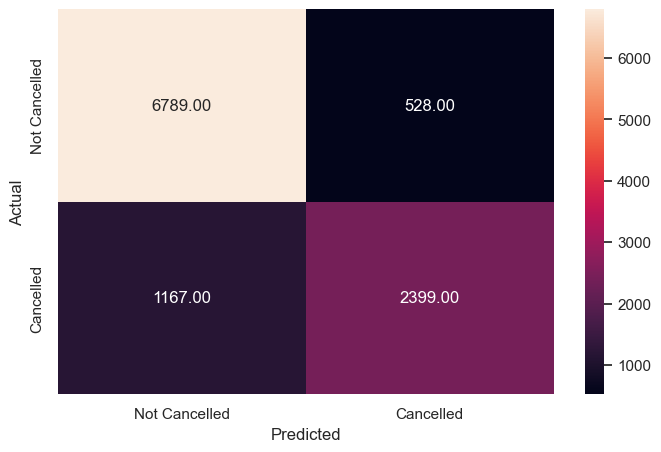

In [91]:
# Remove _________ and complete the code

# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Escriba sus respuestas aquí:
- Estos resultados indican que el modelo ajustado de árbol de decisión sigue manteniendo un buen equilibrio entre precisión y recall para la clase 0 en el conjunto de prueba, aunque la métrica F1-score para la clase 1 es ligeramente inferior. En general, el modelo sigue funcionando bien en la tarea de predecir la cancelación de reservas en los datos de prueba ajustados.

#### **Visualización del árbol de decisión**

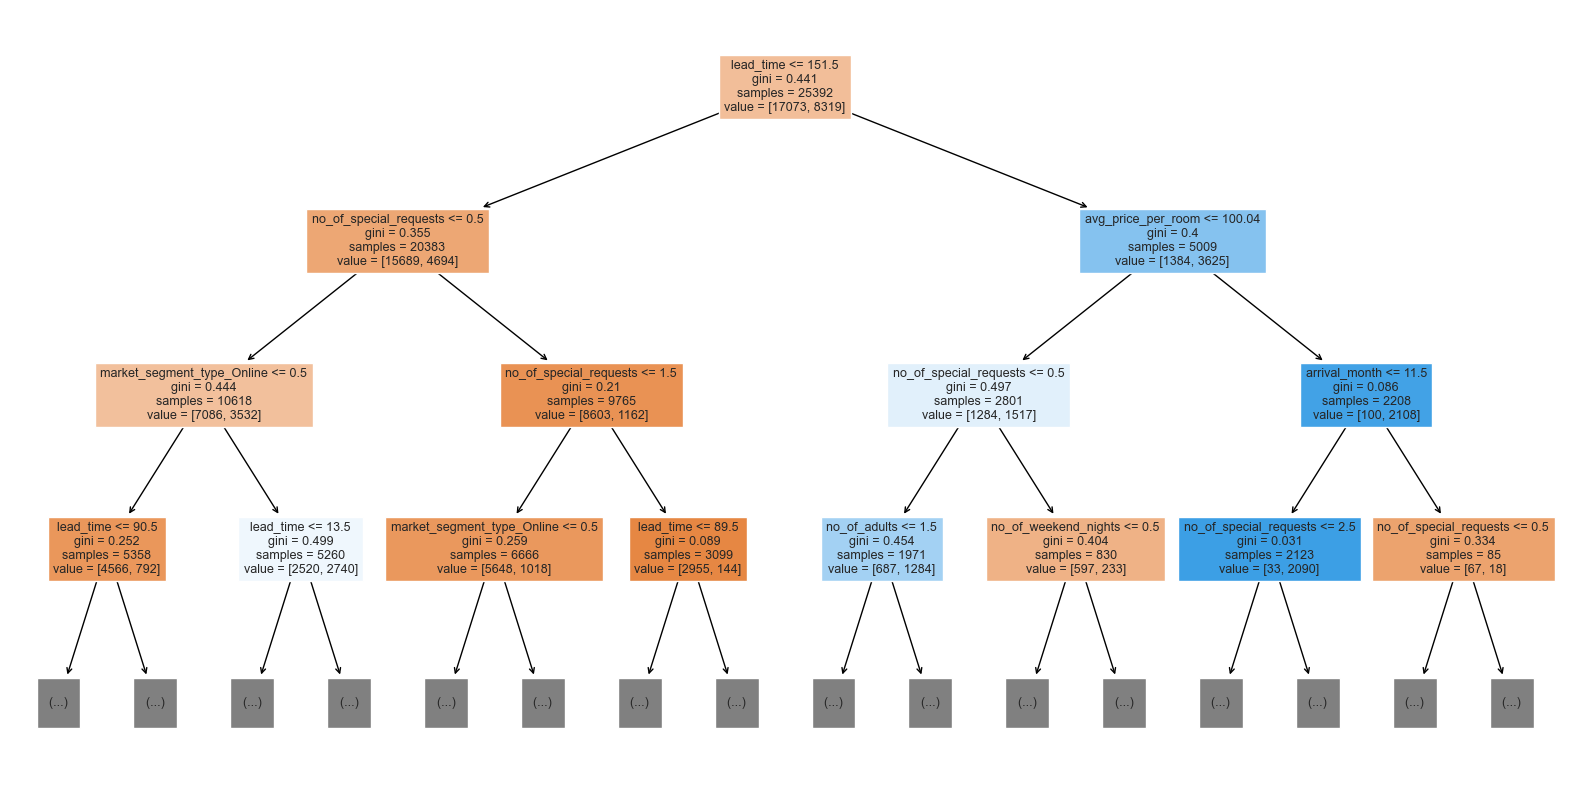

In [92]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **Pregunta 6.5: ¿Cuáles son algunas características importantes basadas en el árbol de decisiones ajustado? (1 Punto)**

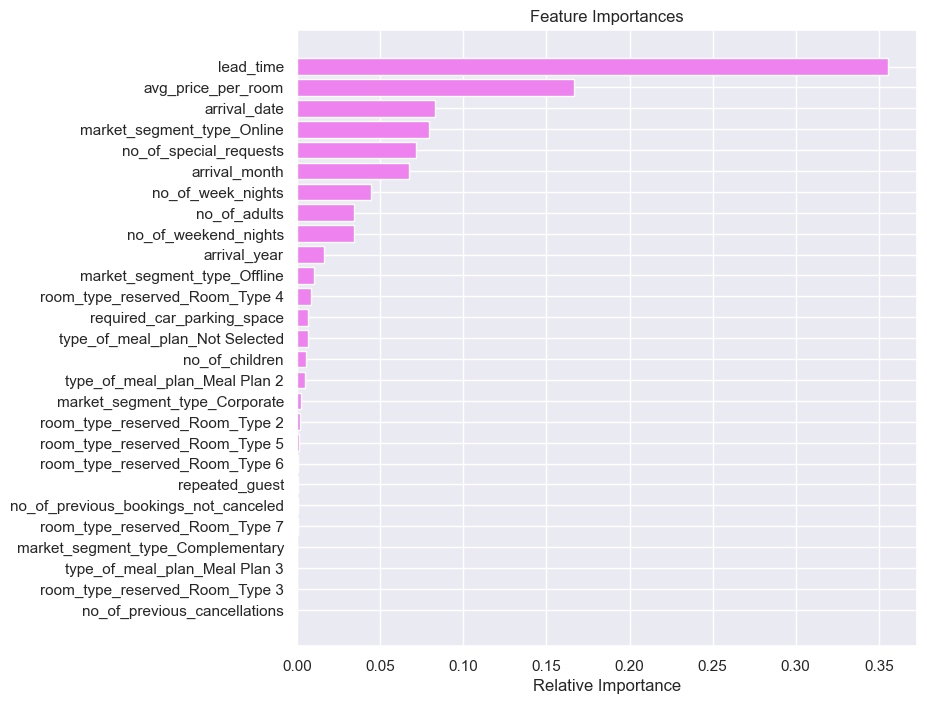

In [93]:
# Remove _________ and complete the code

# Importance of features in the tree building

importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Escriba sus respuestas aquí: 
- Observamos que las características más importantes son:

Tiempo de espera
Valor promedio por persona por haitacion 
Fecha de llegada

___

### **Pregunta 7: Bosque aleatorio (4 puntos)**

#### **Pregunta 7.1: Construya un modelo de bosque aleatorio (1 punto)**

In [94]:
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### **Pregunta 7.2: Compruebe el rendimiento del modelo en los datos de entrenamiento y prueba (2 puntos)**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



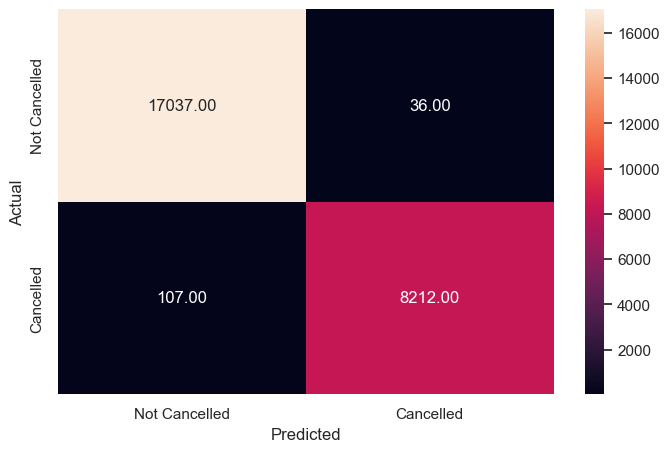

In [95]:
# Remove _________ and complete the code

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

Escriba sus respuestas aquí: 
- Estos resultados sugieren que el modelo de Bosque Aleatorio realiza una clasificación prácticamente perfecta en el conjunto de prueba, con altas puntuaciones de precisión y recall en ambas clases. Sin embargo, es importante recordar que los resultados en el conjunto de prueba pueden no reflejar necesariamente el rendimiento real del modelo en datos de prueba no vistos.

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



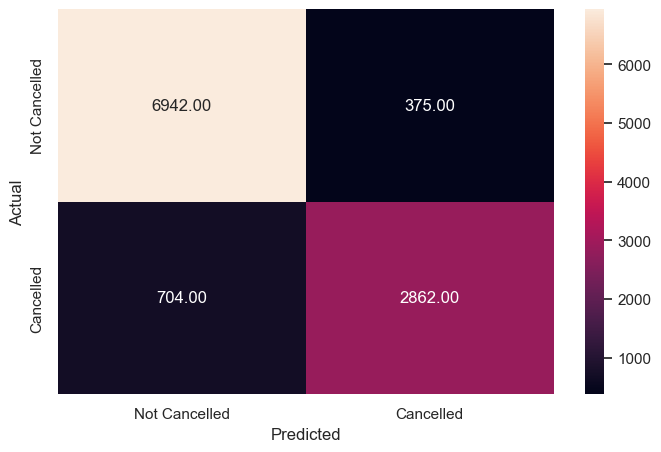

In [96]:
# Remove _________ and complete the code

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

Escriba sus respuestas aquí: 
- Estos resultados confirman que el modelo de Bosque Aleatorio sigue funcionando muy bien en la tarea de predecir la cancelación de reservas en el nuevo conjunto de prueba. Aunque los resultados son ligeramente inferiores en comparación con los resultados anteriores, el modelo mantiene un buen equilibrio entre precisión y recall en ambas clases y sigue siendo altamente preciso y efectivo.

#### **Pregunta 7.3: ¿Cuáles son algunas características importantes basadas en Random Forest? (1 Punto)**

Comprobemos la importancia de las características del Random Forest

<Axes: xlabel='Importance'>

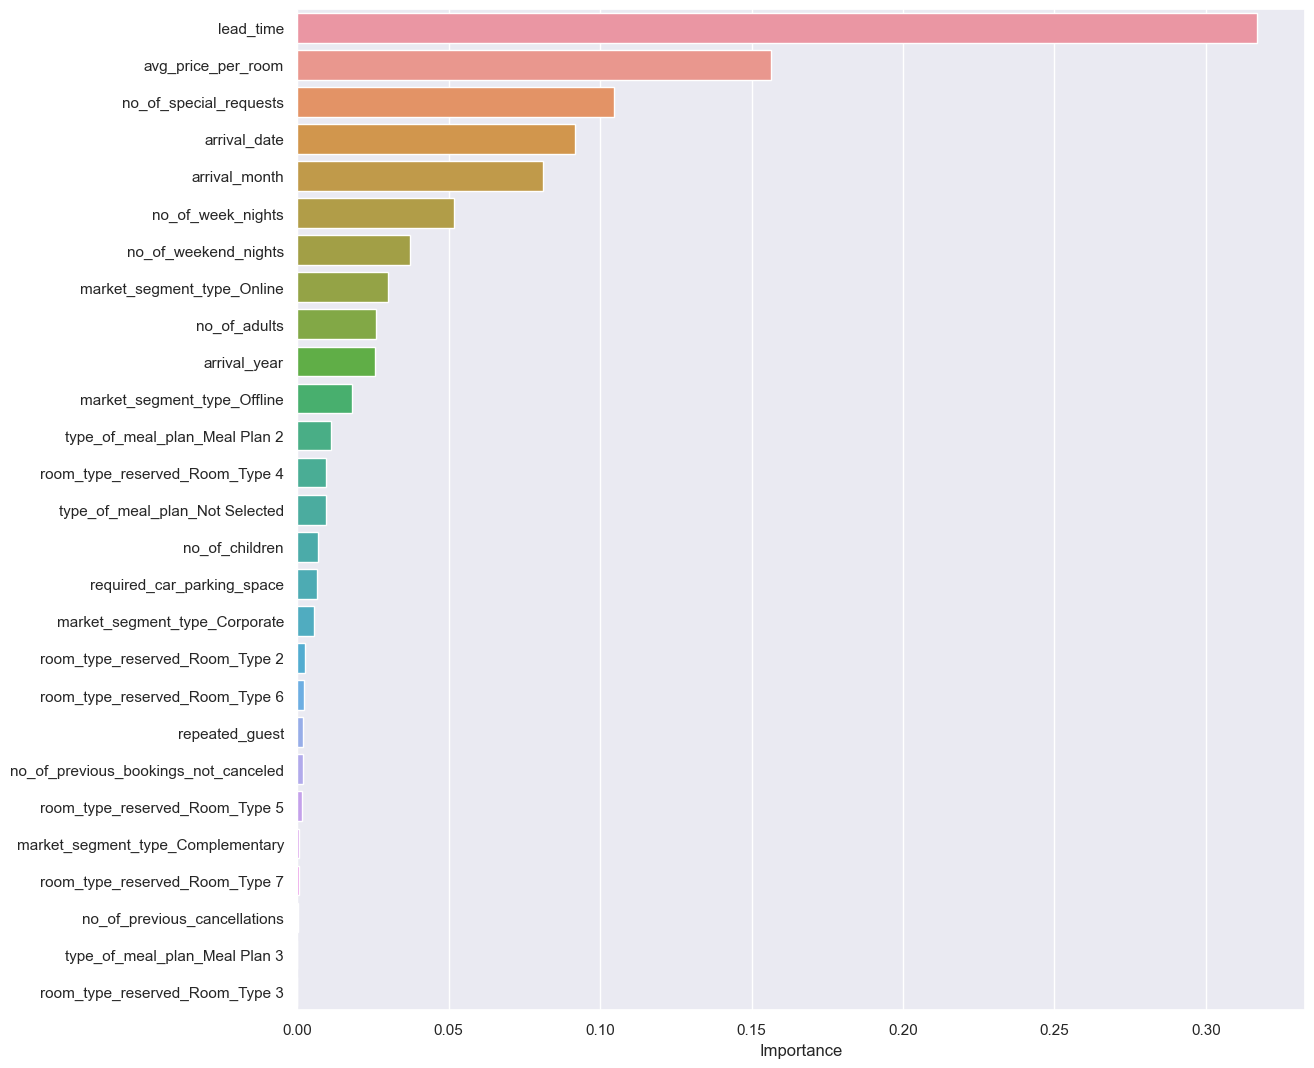

In [98]:
# Remove _________ and complete the code

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

Escriba sus respuestas aquí: 
- Random Forest verifica además los resultados del árbol de decisión, que las características más importantes que son: Tiempo de espera, precio promedio por persona por habitcion y el numero de solicitudes especiales
- El Tiempo de espera es el factor mas importante a la hora de cancelar una reserva para los huespedes del hotel, debe el hotel implementar estrategias que ayuden a disminuir al maximo este factor para que los huspedes continuen visitando el hotel 

### **Pregunta 8: Concluya CUATRO puntos clave para las recomendaciones empresariales (4 puntos)**

Escriba sus respuestas aquí:

1. Identificación de Factores Predictivos: Utilizando los conocimientos obtenidos del modelo de Machine Learning podemos identificar los factores más influyentes causantes de las cancelaciones de reservas. Por ejemplo el Tiempo de espera, precio promedio por persona por habitcion y el numero de solicitudes especiales. Esto permite que el hotel se enfoque en áreas específicas que tienen un mayor impacto en la toma de decisiones de los clientes.

2. Segmentación de Clientes: Dividir a los clientes en segmentos según su probabilidad de cancelación, basándonos en las predicciones del modelo, nos permitirá personalizar las estrategias de retención y marketing para cada grupo. Por ejemplo, podremos ofrecer incentivos especiales a clientes con una alta probabilidad de cancelación.

3. Optimización de la Experiencia del Cliente: Mejorar la experiencia del cliente a lo largo de todo el proceso de reserva y estancia. Esto podría incluir una comunicación proactiva, opciones de cancelación flexibles, ofertas personalizadas y un servicio excepcional. Los comentarios de los clientes también pueden ser útiles para la mejora continua.

4. Implementación de Políticas y Estrategias de Retención: El Desarrollo de políticas y estrategias específicas para reducir las cancelaciones. Por ejemplo, se podría considerar un sistema de depósito no reembolsable para reservas, promociones exclusivas para estancias prolongadas o la implementación de programas de fidelización.

Estos son solo algunos ejemplos de cómo utilizar los resultados del estudio de Machine Learning para abordar el problema de las cancelaciones de reservas. La combinación de análisis predictivos y estrategias proactivas puede ayudar al hotel a mejorar la retención de clientes y a aumentar la ocupación. Es importante realizar un seguimiento constante de los datos y ajustar las estrategias a medida que cambien las tendencias y las preferencias de los clientes.

## **¡Feliz aprendizaje!**